<a href="https://colab.research.google.com/github/shiva7084/QRBT/blob/main/QRBT_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

RESULTS_DIR = Path("results")
ALGORITHMS = ["QAOA", "QAOA_RL", "QSVT", "QPSO", "AQO", "QRBT"]


def load_metric(metric_key):
    """
    Returns:
        levels: sorted list [1..5]
        algo_to_values: dict[algo] -> list of metric values per level
    """
    levels = sorted({1, 2, 3, 4, 5})
    algo_to_values = {}

    for algo in ALGORITHMS:
        fpath = RESULTS_DIR / f"{algo.lower()}_results.json"
        if not fpath.exists():
            continue
        with open(fpath, "r") as f:
            data = json.load(f)

        values = []
        for lvl in levels:
            rec = data.get(str(lvl)) or data.get(lvl)
            if rec is None:
                values.append(np.nan)
            else:
                values.append(rec.get(metric_key, np.nan))
        algo_to_values[algo] = values

    return levels, algo_to_values


def plot_metric(metric_key, ylabel, title, filename):
    levels, algo_to_values = load_metric(metric_key)

    plt.figure()
    for algo, vals in algo_to_values.items():
        plt.plot(levels, vals, marker="o", label=algo)

    plt.xlabel("Workload Level")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(levels)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.savefig(RESULTS_DIR / filename, dpi=300)
    plt.close()


def main():
    RESULTS_DIR.mkdir(exist_ok=True, parents=True)

    plot_metric(
        "latency_reduction_pct",
        "Latency Reduction (%)",
        "Transaction Processing Latency Reduction vs Workload",
        "latency_reduction.png",
    )

    plot_metric(
        "security_pct",
        "Cryptographic Security (%)",
        "Cryptographic Security Under Quantum Attacks",
        "security_quantum.png",
    )

    plot_metric(
        "scalability_pct",
        "Scalability (TPS %)",
        "Blockchain Scalability vs Workload",
        "scalability.png",
    )

    plot_metric(
        "energy_kwh",
        "Energy (kWh)",
        "Energy-Efficient Consensus vs Workload",
        "energy.png",
    )

    plot_metric(
        "convergence_score_pct",
        "RL Convergence Rate (%)",
        "RL Convergence Rate vs Workload",
        "rl_convergence.png",
    )

    print("Plots saved in:", RESULTS_DIR)


if __name__ == "__main__":
    main()


/tmp/ipython-input-873352326.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Plots saved in: results


Saved 5 workflow figures: montage_workflow.png, epigenomics_workflow.png, cybershake_workflow.png, ligo_workflow.png, sipht_workflow.png


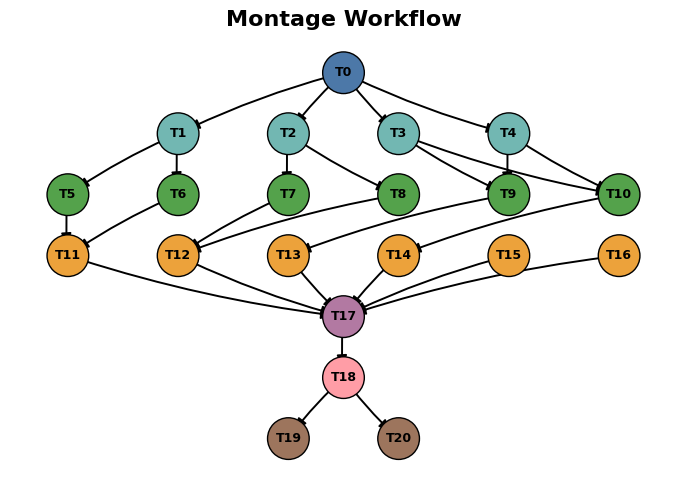

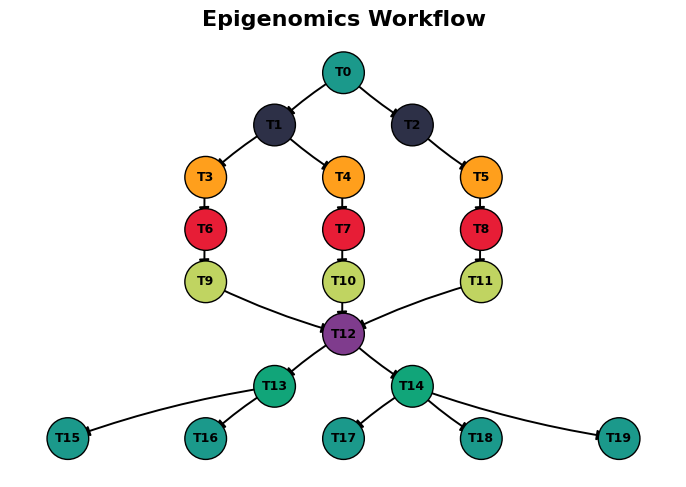

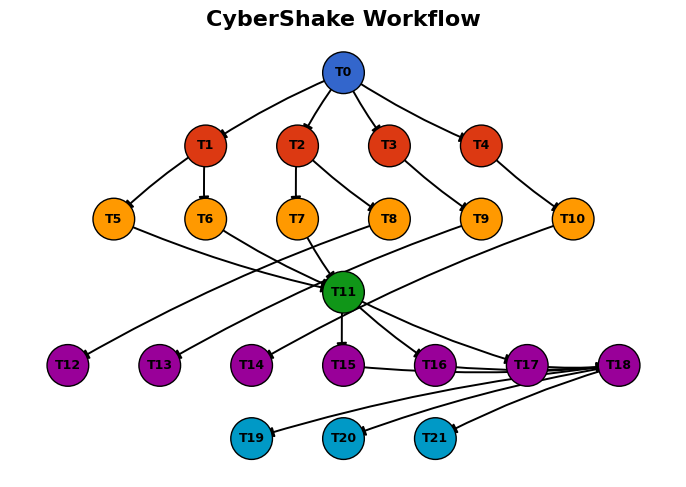

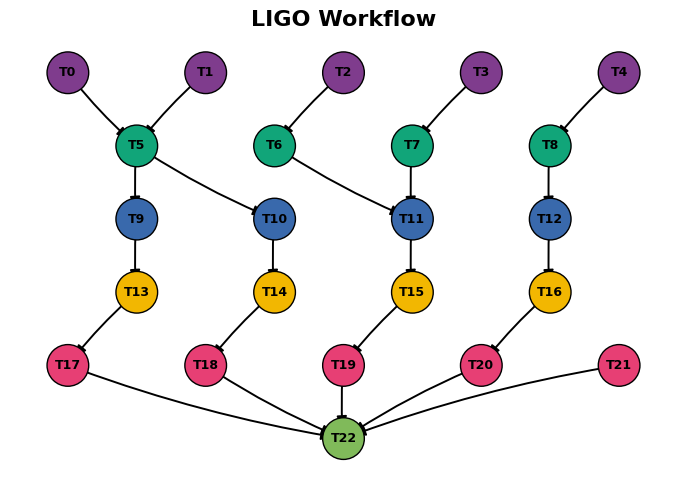

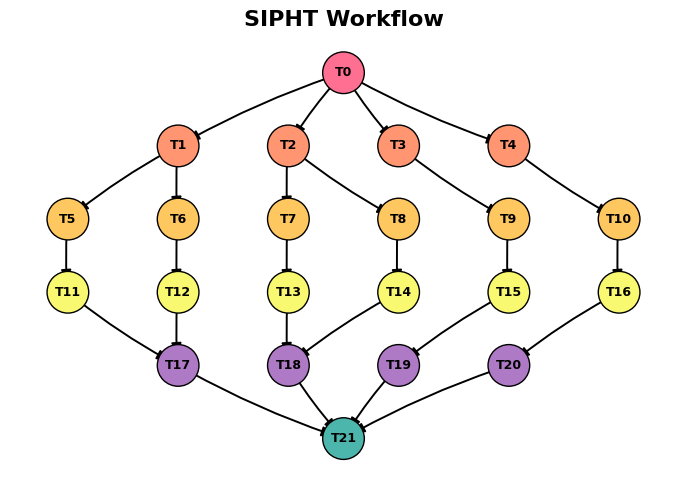

In [ ]:
# ---------- Scientific Workflows: Montage, Epigenomics, CyberShake, LIGO, SIPHT ----------
# Requires: networkx, matplotlib
#   pip install networkx matplotlib

import matplotlib.pyplot as plt
import networkx as nx

plt.rcParams["figure.figsize"] = (7, 5)
plt.rcParams["font.size"] = 11


def build_layer_positions(layers, y_gap=1.4, x_gap=1.4):
    """
    layers = list of lists, e.g. [["T0"], ["T1","T2"], ["T3","T4","T5"], ...]
    returns: dict {node: (x, y)}
    """
    pos = {}
    for i, layer in enumerate(layers):
        y = -i * y_gap
        n = len(layer)
        # center the layer around x = 0
        x_start = -(n - 1) / 2.0 * x_gap
        for j, node in enumerate(layer):
            pos[node] = (x_start + j * x_gap, y)
    return pos


def draw_workflow(name, layers, edges, palette, outfile):
    """
    name   : workflow name (title)
    layers : list of node-lists from top to bottom
    edges  : list of (u, v) tuples
    palette: list of colors used per layer
    """
    G = nx.DiGraph()
    for layer in layers:
        G.add_nodes_from(layer)
    G.add_edges_from(edges)

    pos = build_layer_positions(layers)

    # build node colors by layer
    node_colors = {}
    for i, layer in enumerate(layers):
        color = palette[i % len(palette)]
        for n in layer:
            node_colors[n] = color

    nodes = list(G.nodes())
    colors = [node_colors[n] for n in nodes]

    plt.figure()
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=nodes,
        node_color=colors,
        edgecolors="black",
        node_size=900,
    )
    nx.draw_networkx_labels(G, pos, font_weight="bold", font_size=9)
    nx.draw_networkx_edges(
        G,
        pos,
        arrows=True,
        arrowstyle="-|>",
        arrowsize=15,
        width=1.4,
        connectionstyle="arc3,rad=0.05",
    )
    plt.title(name, fontsize=16, fontweight="bold")
    plt.axis("off")
    plt.tight_layout()
    plt.savefig(outfile, dpi=300, bbox_inches="tight")
    # plt.show()   # uncomment if you want each window to pop up


# -------------------------------------------------------------------
# 1) MONTAGE (astronomy image mosaic)
# -------------------------------------------------------------------
layers_montage = [
    ["T0"],
    ["T1", "T2", "T3", "T4"],
    ["T5", "T6", "T7", "T8", "T9", "T10"],
    ["T11", "T12", "T13", "T14", "T15", "T16"],
    ["T17"],
    ["T18"],
    ["T19", "T20"],
]

edges_montage = [
    ("T0", "T1"), ("T0", "T2"), ("T0", "T3"), ("T0", "T4"),
    ("T1", "T5"), ("T1", "T6"),
    ("T2", "T7"), ("T2", "T8"),
    ("T3", "T9"), ("T3", "T10"),
    ("T4", "T9"), ("T4", "T10"),
    ("T5", "T11"), ("T6", "T11"),
    ("T7", "T12"), ("T8", "T12"),
    ("T9", "T13"), ("T10", "T14"),
    ("T11", "T17"), ("T12", "T17"), ("T13", "T17"), ("T14", "T17"), ("T15", "T17"), ("T16", "T17"),
    ("T17", "T18"),
    ("T18", "T19"), ("T18", "T20"),
]

palette_montage = ["#4C78A8", "#72B7B2", "#54A24B", "#ECA23B", "#B279A2", "#FF9DA6", "#9D755D"]


# -------------------------------------------------------------------
# 2) EPIGENOMICS (DNA sequencing pipeline)
# -------------------------------------------------------------------
layers_epi = [
    ["T0"],
    ["T1", "T2"],
    ["T3", "T4", "T5"],
    ["T6", "T7", "T8"],
    ["T9", "T10", "T11"],
    ["T12"],
    ["T13", "T14"],
    ["T15", "T16", "T17", "T18", "T19"],
]

edges_epi = [
    ("T0", "T1"), ("T0", "T2"),
    ("T1", "T3"), ("T1", "T4"),
    ("T2", "T5"),
    ("T3", "T6"), ("T4", "T7"), ("T5", "T8"),
    ("T6", "T9"), ("T7", "T10"), ("T8", "T11"),
    ("T9", "T12"), ("T10", "T12"), ("T11", "T12"),
    ("T12", "T13"), ("T12", "T14"),
    ("T13", "T15"), ("T13", "T16"),
    ("T14", "T17"), ("T14", "T18"), ("T14", "T19"),
]

palette_epi = ["#1B998B", "#2D3047", "#FF9F1C", "#E71D36", "#C0D461", "#7F3C8D", "#11A579"]


# -------------------------------------------------------------------
# 3) CYBERSHAKE (seismic hazard workflow)
# -------------------------------------------------------------------
layers_cyber = [
    ["T0"],
    ["T1", "T2", "T3", "T4"],
    ["T5", "T6", "T7", "T8", "T9", "T10"],
    ["T11"],
    ["T12", "T13", "T14", "T15", "T16", "T17", "T18"],
    ["T19", "T20", "T21"],
]

edges_cyber = [
    ("T0", "T1"), ("T0", "T2"), ("T0", "T3"), ("T0", "T4"),
    ("T1", "T5"), ("T1", "T6"),
    ("T2", "T7"), ("T2", "T8"),
    ("T3", "T9"), ("T4", "T10"),
    ("T5", "T11"), ("T6", "T11"), ("T7", "T11"),
    ("T8", "T12"), ("T9", "T13"), ("T10", "T14"),
    ("T11", "T15"), ("T11", "T16"), ("T11", "T17"),
    ("T15", "T18"), ("T16", "T18"), ("T17", "T18"),
    ("T18", "T19"), ("T18", "T20"), ("T18", "T21"),
]

palette_cyber = ["#3366CC", "#DC3912", "#FF9900", "#109618", "#990099", "#0099C6", "#DD4477"]


# -------------------------------------------------------------------
# 4) LIGO (gravitational wave workflow)
# -------------------------------------------------------------------
layers_ligo = [
    ["T0", "T1", "T2", "T3", "T4"],
    ["T5", "T6", "T7", "T8"],
    ["T9", "T10", "T11", "T12"],
    ["T13", "T14", "T15", "T16"],
    ["T17", "T18", "T19", "T20", "T21"],
    ["T22"],
]

edges_ligo = [
    ("T0", "T5"), ("T1", "T5"),
    ("T2", "T6"), ("T3", "T7"), ("T4", "T8"),
    ("T5", "T9"), ("T5", "T10"),
    ("T6", "T11"), ("T7", "T11"), ("T8", "T12"),
    ("T9", "T13"), ("T10", "T14"),
    ("T11", "T15"), ("T12", "T16"),
    ("T13", "T17"), ("T14", "T18"), ("T15", "T19"), ("T16", "T20"),
    ("T17", "T22"), ("T18", "T22"), ("T19", "T22"), ("T20", "T22"), ("T21", "T22"),
]

palette_ligo = ["#7F3C8D", "#11A579", "#3969AC", "#F2B701", "#E73F74", "#80BA5A"]


# -------------------------------------------------------------------
# 5) SIPHT (bioinformatics / RNA prediction)
# -------------------------------------------------------------------
layers_sipht = [
    ["T0"],
    ["T1", "T2", "T3", "T4"],
    ["T5", "T6", "T7", "T8", "T9", "T10"],
    ["T11", "T12", "T13", "T14", "T15", "T16"],
    ["T17", "T18", "T19", "T20"],
    ["T21"],
]

edges_sipht = [
    ("T0", "T1"), ("T0", "T2"), ("T0", "T3"), ("T0", "T4"),
    ("T1", "T5"), ("T1", "T6"),
    ("T2", "T7"), ("T2", "T8"),
    ("T3", "T9"), ("T4", "T10"),
    ("T5", "T11"), ("T6", "T12"),
    ("T7", "T13"), ("T8", "T14"),
    ("T9", "T15"), ("T10", "T16"),
    ("T11", "T17"), ("T12", "T17"),
    ("T13", "T18"), ("T14", "T18"),
    ("T15", "T19"), ("T16", "T20"),
    ("T17", "T21"), ("T18", "T21"), ("T19", "T21"), ("T20", "T21"),
]

palette_sipht = ["#FF6F91", "#FF9671", "#FFC75F", "#F9F871", "#AF7AC5", "#4DB6AC"]


# -------------------------------------------------------------------
# Draw and save all workflows
# -------------------------------------------------------------------
draw_workflow("Montage Workflow",      layers_montage, layers_montage and edges_montage, palette_montage, "montage_workflow.png")
draw_workflow("Epigenomics Workflow",  layers_epi,     edges_epi,     palette_epi,      "epigenomics_workflow.png")
draw_workflow("CyberShake Workflow",   layers_cyber,   edges_cyber,   palette_cyber,    "cybershake_workflow.png")
draw_workflow("LIGO Workflow",         layers_ligo,    edges_ligo,    palette_ligo,     "ligo_workflow.png")
draw_workflow("SIPHT Workflow",        layers_sipht,   edges_sipht,   palette_sipht,    "sipht_workflow.png")

print("Saved 5 workflow figures: montage_workflow.png, epigenomics_workflow.png, cybershake_workflow.png, ligo_workflow.png, sipht_workflow.png")


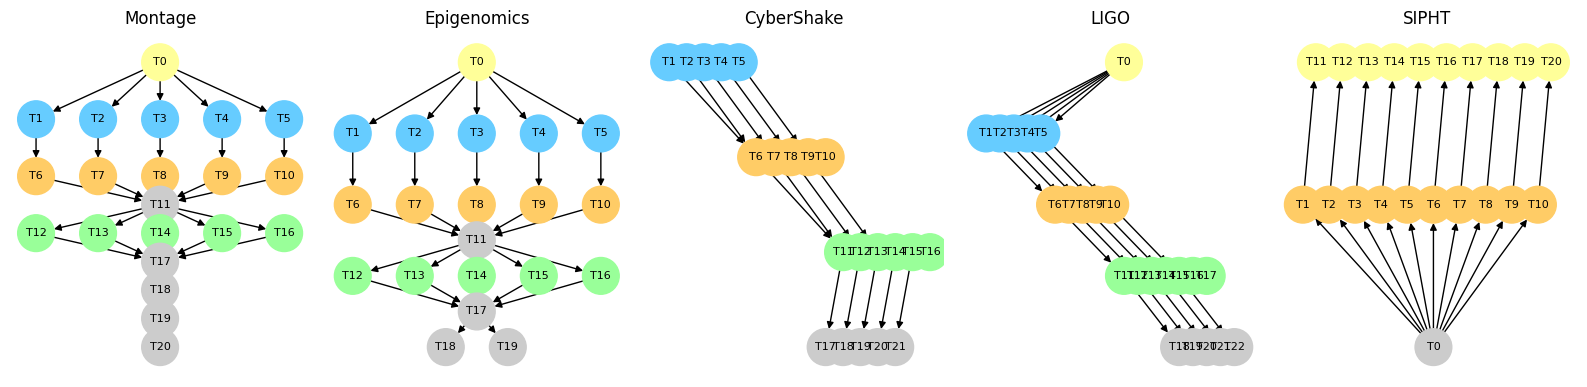

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(16, 4))

# Common drawing helper
def draw_workflow(ax, nodes, pos, edges, title):
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    # color map by level (optional, adapt as you like)
    colors = []
    for n in G.nodes():
        level = pos[n][1]
        if level == 4:   # top
            colors.append('#ffff99')
        elif level == 3:
            colors.append('#66ccff')
        elif level == 2:
            colors.append('#ffcc66')
        elif level == 1:
            colors.append('#99ff99')
        else:
            colors.append('#cccccc')

    nx.draw(G, pos,
            ax=ax,
            with_labels=True,
            node_size=700,
            node_color=colors,
            arrows=True,
            arrowsize=10,
            font_size=8)
    ax.set_title(title, fontsize=12)
    ax.axis('off')


# --------- 1) Montage (example structure, edit to match your exact DAG) ----------
ax1 = plt.subplot(1, 5, 1)

nodes_m = ['T0','T1','T2','T3','T4','T5','T6','T7','T8','T9',
           'T10','T11','T12','T13','T14','T15','T16','T17','T18','T19','T20']

# x,y positions (y = level); tune x positions to look like your picture
pos_m = {
    'T0': (0, 4),
    'T1': (-2, 3), 'T2': (-1, 3), 'T3': (0, 3), 'T4': (1, 3), 'T5': (2, 3),
    'T6': (-2, 2), 'T7': (-1, 2), 'T8': (0, 2), 'T9': (1, 2), 'T10': (2, 2),
    'T11': (0, 1.5),
    'T12': (-2, 1), 'T13': (-1, 1), 'T14': (0, 1), 'T15': (1, 1), 'T16': (2, 1),
    'T17': (0, 0.5),
    'T18': (0, 0), 'T19': (0, -0.5), 'T20': (0, -1)
}

edges_m = [
    ('T0','T1'),('T0','T2'),('T0','T3'),('T0','T4'),('T0','T5'),
    ('T1','T6'),('T2','T7'),('T3','T8'),('T4','T9'),('T5','T10'),
    ('T6','T11'),('T7','T11'),('T8','T11'),('T9','T11'),('T10','T11'),
    ('T11','T12'),('T11','T13'),('T11','T14'),('T11','T15'),('T11','T16'),
    ('T12','T17'),('T13','T17'),('T14','T17'),('T15','T17'),('T16','T17'),
    ('T17','T18'),('T18','T19'),('T19','T20')
]

draw_workflow(ax1, nodes_m, pos_m, edges_m, 'Montage')


# --------- 2) Epigenomics (skeleton – fill nodes/edges as needed) ----------
ax2 = plt.subplot(1, 5, 2)
nodes_e = ['T0','T1','T2','T3','T4','T5','T6','T7','T8','T9',
           'T10','T11','T12','T13','T14','T15','T16','T17','T18','T19']
pos_e = {  # simple diamond-ish layout; adjust to match figure
    'T0': (0, 4),
    'T1': (-2, 3), 'T2': (-1, 3), 'T3': (0, 3), 'T4': (1, 3), 'T5': (2, 3),
    'T6': (-2, 2), 'T7': (-1, 2), 'T8': (0, 2), 'T9': (1, 2), 'T10': (2, 2),
    'T11': (0, 1.5),
    'T12': (-2, 1), 'T13': (-1, 1), 'T14': (0, 1), 'T15': (1, 1), 'T16': (2, 1),
    'T17': (0, 0.5),
    'T18': (-0.5, 0), 'T19': (0.5, 0)
}
edges_e = [
    ('T0','T1'),('T0','T2'),('T0','T3'),('T0','T4'),('T0','T5'),
    ('T1','T6'),('T2','T7'),('T3','T8'),('T4','T9'),('T5','T10'),
    ('T6','T11'),('T7','T11'),('T8','T11'),('T9','T11'),('T10','T11'),
    ('T11','T12'),('T11','T13'),('T11','T14'),('T11','T15'),('T11','T16'),
    ('T12','T17'),('T13','T17'),('T14','T17'),('T15','T17'),('T16','T17'),
    ('T17','T18'),('T17','T19')
]
draw_workflow(ax2, nodes_e, pos_e, edges_e, 'Epigenomics')


# --------- 3) CyberShake (placeholder layout) ----------
ax3 = plt.subplot(1, 5, 3)
nodes_c = ['T{}'.format(i) for i in range(1, 22)]
pos_c = {f'T{i}': (i-11, 3) for i in range(1, 6)}
pos_c.update({f'T{i}': (i-11, 2) for i in range(6, 11)})
pos_c.update({f'T{i}': (i-11, 1) for i in range(11, 17)})
pos_c.update({f'T{i}': (i-18, 0) for i in range(17, 22)})
edges_c = [('T1','T6'), ('T2','T6'), ('T3','T7'), ('T4','T8'), ('T5','T9'),
           ('T6','T11'),('T7','T11'),('T8','T12'),('T9','T13'),
           ('T11','T17'),('T12','T18'),('T13','T19'),('T14','T20'),('T15','T21')]
draw_workflow(ax3, nodes_c, pos_c, edges_c, 'CyberShake')


# --------- 4) LIGO (placeholder layout) ----------
ax4 = plt.subplot(1, 5, 4)
nodes_l = ['T{}'.format(i) for i in range(0, 23)]
pos_l = {f'T{i}': (i-11, 3) for i in range(1, 6)}
pos_l['T0'] = (0, 4)
pos_l.update({f'T{i}': (i-11, 2) for i in range(6, 11)})
pos_l.update({f'T{i}': (i-11, 1) for i in range(11, 18)})
pos_l.update({f'T{i}': (i-14, 0) for i in range(18, 23)})
edges_l = [('T0','T1'),('T0','T2'),('T0','T3'),('T0','T4'),('T0','T5'),
           ('T1','T6'),('T2','T7'),('T3','T8'),('T4','T9'),('T5','T10'),
           ('T6','T11'),('T7','T12'),('T8','T13'),('T9','T14'),('T10','T15'),
           ('T11','T18'),('T12','T19'),('T13','T20'),('T14','T21'),('T15','T22')]
draw_workflow(ax4, nodes_l, pos_l, edges_l, 'LIGO')


# --------- 5) SIPHT (placeholder fan-in / fan-out) ----------
ax5 = plt.subplot(1, 5, 5)
nodes_s = ['T0'] + [f'T{i}' for i in range(1, 21)]
pos_s = {'T0': (0, 0)}
for i in range(1, 11):
    pos_s[f'T{i}'] = (i-6, 2)
for i in range(11, 21):
    pos_s[f'T{i}'] = (i-15.5, 4)
edges_s = []
for i in range(1, 11):
    edges_s.append(('T0', f'T{i}'))
    edges_s.append((f'T{i}', f'T{10+i}'))
draw_workflow(ax5, nodes_s, pos_s, edges_s, 'SIPHT')

plt.tight_layout()
plt.show()


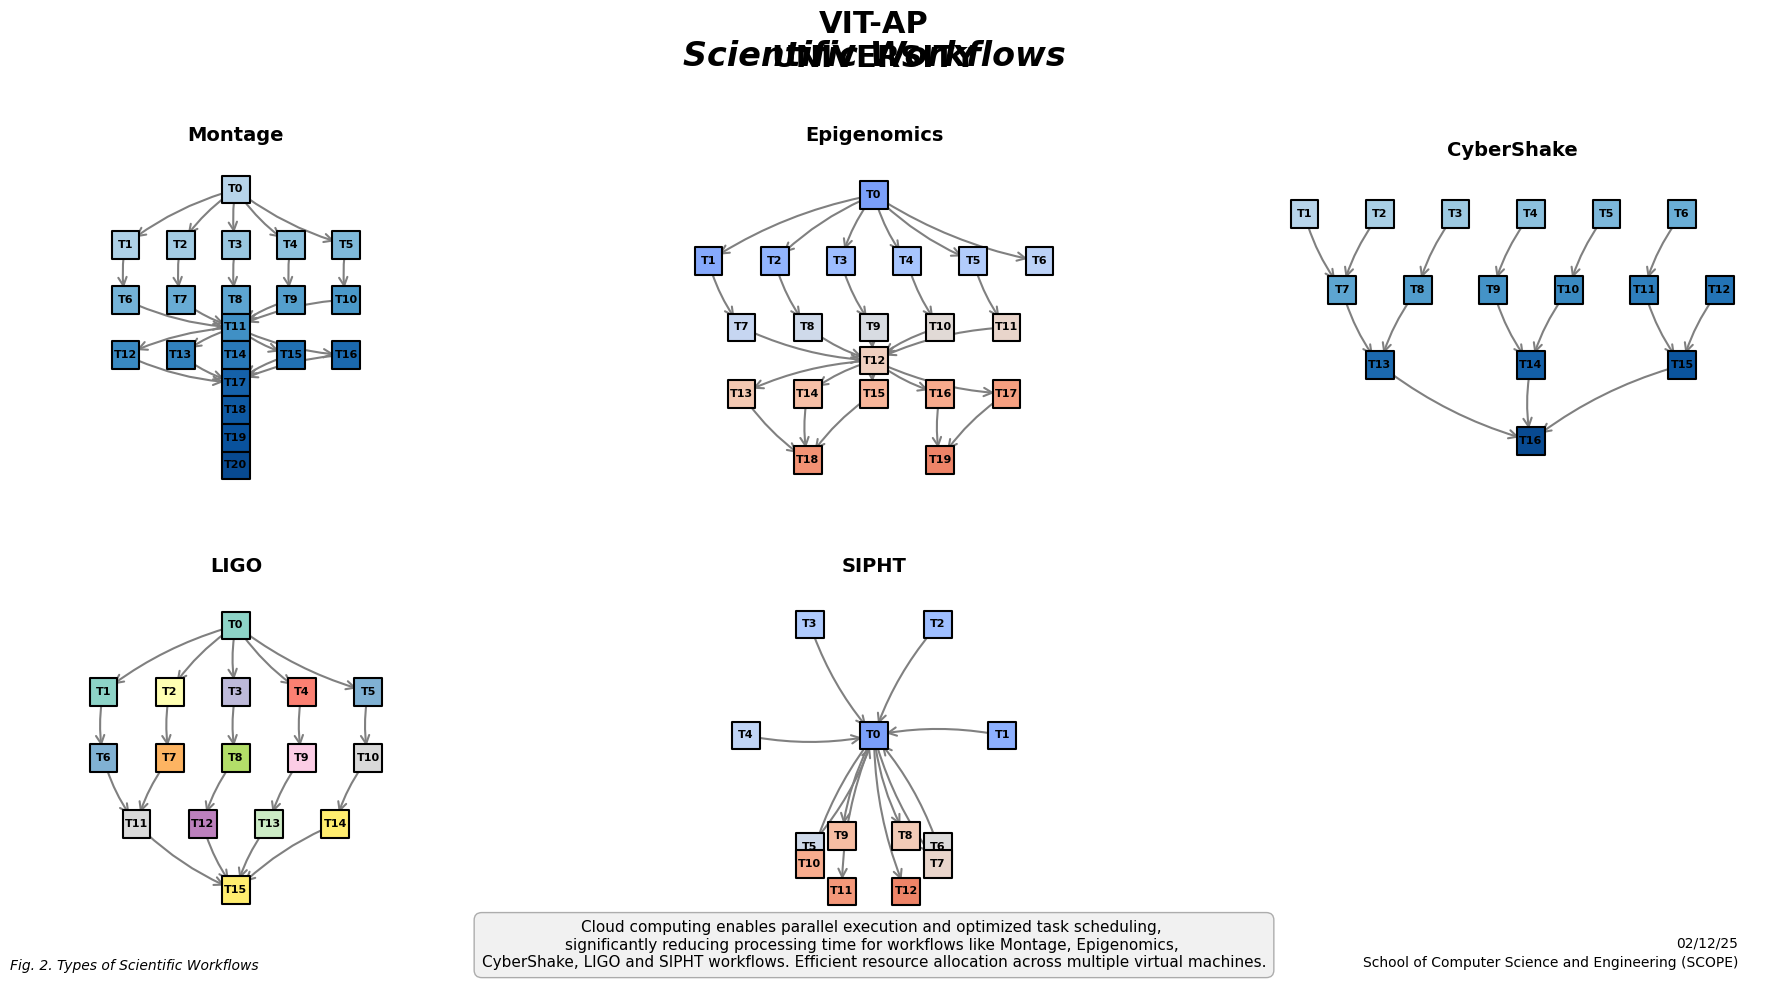

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Create figure with appropriate size
fig = plt.figure(figsize=(18, 10))

# Add title at the top
fig.suptitle('Scientific Workflows', fontsize=24, fontweight='bold', fontstyle='italic', y=0.95)

# Add VIT-AP UNIVERSITY header
plt.figtext(0.5, 0.98, 'VIT-AP\nUNIVERSITY', ha='center', va='top',
            fontsize=22, fontweight='bold', fontfamily='sans-serif',
            linespacing=1.2)

# Common drawing helper with improved styling
def draw_workflow(ax, nodes, pos, edges, title, node_colors=None):
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    # Default color scheme if not provided
    if node_colors is None:
        node_colors = ['#ff9999' for _ in nodes]  # Default light red

    # Draw the graph with better styling
    nx.draw_networkx_nodes(G, pos, ax=ax,
                          node_size=400,
                          node_color=node_colors,
                          node_shape='s',  # Square nodes
                          edgecolors='black',
                          linewidths=1.5)

    nx.draw_networkx_edges(G, pos, ax=ax,
                          arrows=True,
                          arrowsize=15,
                          arrowstyle='->',
                          edge_color='gray',
                          width=1.5,
                          connectionstyle="arc3,rad=0.1")

    # Add labels with better formatting
    nx.draw_networkx_labels(G, pos, ax=ax,
                           font_size=8,
                           font_weight='bold',
                           font_family='sans-serif')

    ax.set_title(title, fontsize=14, fontweight='bold', pad=15)
    ax.set_facecolor('#f8f9fa')
    ax.axis('off')

    # Set limits with some padding
    x_vals = [pos[node][0] for node in pos]
    y_vals = [pos[node][1] for node in pos]
    ax.set_xlim(min(x_vals)-0.5, max(x_vals)+0.5)
    ax.set_ylim(min(y_vals)-0.5, max(y_vals)+0.5)
    ax.set_aspect('equal', adjustable='box')

# Color schemes for different workflows
def get_color_scheme(nodes, scheme='sequential'):
    if scheme == 'sequential':
        # Sequential color scheme (blue gradient)
        return plt.cm.Blues(np.linspace(0.3, 0.9, len(nodes)))
    elif scheme == 'diverging':
        # Diverging color scheme (cool to warm)
        return plt.cm.coolwarm(np.linspace(0.2, 0.8, len(nodes)))
    elif scheme == 'qualitative':
        # Qualitative color scheme
        return plt.cm.Set3(np.linspace(0, 1, len(nodes)))

# --------- 1) Montage ----------
ax1 = plt.subplot(2, 3, 1)  # Changed to 2x3 grid
nodes_m = ['T0','T1','T2','T3','T4','T5','T6','T7','T8','T9',
           'T10','T11','T12','T13','T14','T15','T16','T17','T18','T19','T20']

# Improved positions for better symmetry
pos_m = {
    'T0': (0, 4),
    'T1': (-2, 3), 'T2': (-1, 3), 'T3': (0, 3), 'T4': (1, 3), 'T5': (2, 3),
    'T6': (-2, 2), 'T7': (-1, 2), 'T8': (0, 2), 'T9': (1, 2), 'T10': (2, 2),
    'T11': (0, 1.5),
    'T12': (-2, 1), 'T13': (-1, 1), 'T14': (0, 1), 'T15': (1, 1), 'T16': (2, 1),
    'T17': (0, 0.5),
    'T18': (0, 0), 'T19': (0, -0.5), 'T20': (0, -1)
}

edges_m = [
    ('T0','T1'),('T0','T2'),('T0','T3'),('T0','T4'),('T0','T5'),
    ('T1','T6'),('T2','T7'),('T3','T8'),('T4','T9'),('T5','T10'),
    ('T6','T11'),('T7','T11'),('T8','T11'),('T9','T11'),('T10','T11'),
    ('T11','T12'),('T11','T13'),('T11','T14'),('T11','T15'),('T11','T16'),
    ('T12','T17'),('T13','T17'),('T14','T17'),('T15','T17'),('T16','T17'),
    ('T17','T18'),('T18','T19'),('T19','T20')
]

draw_workflow(ax1, nodes_m, pos_m, edges_m, 'Montage', get_color_scheme(nodes_m, 'sequential'))

# --------- 2) Epigenomics ----------
ax2 = plt.subplot(2, 3, 2)
nodes_e = ['T0','T1','T2','T3','T4','T5','T6','T7','T8','T9',
           'T10','T11','T12','T13','T14','T15','T16','T17','T18','T19']

# More structured layout
pos_e = {
    'T0': (0, 4),
    'T1': (-2.5, 3), 'T2': (-1.5, 3), 'T3': (-0.5, 3), 'T4': (0.5, 3), 'T5': (1.5, 3), 'T6': (2.5, 3),
    'T7': (-2, 2), 'T8': (-1, 2), 'T9': (0, 2), 'T10': (1, 2), 'T11': (2, 2),
    'T12': (0, 1.5),
    'T13': (-2, 1), 'T14': (-1, 1), 'T15': (0, 1), 'T16': (1, 1), 'T17': (2, 1),
    'T18': (-1, 0), 'T19': (1, 0)
}

edges_e = [
    ('T0','T1'),('T0','T2'),('T0','T3'),('T0','T4'),('T0','T5'),('T0','T6'),
    ('T1','T7'),('T2','T8'),('T3','T9'),('T4','T10'),('T5','T11'),
    ('T7','T12'),('T8','T12'),('T9','T12'),('T10','T12'),('T11','T12'),
    ('T12','T13'),('T12','T14'),('T12','T15'),('T12','T16'),('T12','T17'),
    ('T13','T18'),('T14','T18'),('T15','T18'),('T16','T19'),('T17','T19')
]

draw_workflow(ax2, nodes_e, pos_e, edges_e, 'Epigenomics', get_color_scheme(nodes_e, 'diverging'))

# --------- 3) CyberShake ----------
ax3 = plt.subplot(2, 3, 3)
nodes_c = [f'T{i}' for i in range(1, 17)]

# Pipeline-like structure
pos_c = {
    'T1': (-3, 3), 'T2': (-2, 3), 'T3': (-1, 3), 'T4': (0, 3), 'T5': (1, 3), 'T6': (2, 3),
    'T7': (-2.5, 2), 'T8': (-1.5, 2), 'T9': (-0.5, 2), 'T10': (0.5, 2), 'T11': (1.5, 2), 'T12': (2.5, 2),
    'T13': (-2, 1), 'T14': (0, 1), 'T15': (2, 1),
    'T16': (0, 0)
}

edges_c = [
    ('T1','T7'),('T2','T7'),('T3','T8'),('T4','T9'),('T5','T10'),('T6','T11'),
    ('T7','T13'),('T8','T13'),('T9','T14'),('T10','T14'),('T11','T15'),('T12','T15'),
    ('T13','T16'),('T14','T16'),('T15','T16')
]

draw_workflow(ax3, nodes_c, pos_c, edges_c, 'CyberShake', get_color_scheme(nodes_c, 'sequential'))

# --------- 4) LIGO ----------
ax4 = plt.subplot(2, 3, 4)
nodes_l = [f'T{i}' for i in range(0, 16)]

# Tree-like structure
pos_l = {
    'T0': (0, 4),
    'T1': (-2, 3), 'T2': (-1, 3), 'T3': (0, 3), 'T4': (1, 3), 'T5': (2, 3),
    'T6': (-2, 2), 'T7': (-1, 2), 'T8': (0, 2), 'T9': (1, 2), 'T10': (2, 2),
    'T11': (-1.5, 1), 'T12': (-0.5, 1), 'T13': (0.5, 1), 'T14': (1.5, 1),
    'T15': (0, 0)
}

edges_l = [
    ('T0','T1'),('T0','T2'),('T0','T3'),('T0','T4'),('T0','T5'),
    ('T1','T6'),('T2','T7'),('T3','T8'),('T4','T9'),('T5','T10'),
    ('T6','T11'),('T7','T11'),('T8','T12'),('T9','T13'),('T10','T14'),
    ('T11','T15'),('T12','T15'),('T13','T15'),('T14','T15')
]

draw_workflow(ax4, nodes_l, pos_l, edges_l, 'LIGO', get_color_scheme(nodes_l, 'qualitative'))

# --------- 5) SIPHT ----------
ax5 = plt.subplot(2, 3, 5)
nodes_s = ['T0'] + [f'T{i}' for i in range(1, 13)]

# Fan-in/Fan-out structure
pos_s = {'T0': (0, 2)}
# Input nodes
for i in range(1, 7):
    angle = (i-1) * (np.pi/3)
    pos_s[f'T{i}'] = (2*np.cos(angle), 2 + 2*np.sin(angle))
# Output nodes
for i in range(7, 13):
    angle = (i-7) * (np.pi/3)
    pos_s[f'T{i}'] = (np.cos(angle), 0.5*np.sin(angle))

edges_s = []
for i in range(1, 7):
    edges_s.append((f'T{i}', 'T0'))
    edges_s.append(('T0', f'T{i+6}'))

draw_workflow(ax5, nodes_s, pos_s, edges_s, 'SIPHT', get_color_scheme(nodes_s, 'diverging'))

# Add description text at the bottom
desc_text = """Cloud computing enables parallel execution and optimized task scheduling,
significantly reducing processing time for workflows like Montage, Epigenomics,
CyberShake, LIGO and SIPHT workflows. Efficient resource allocation across multiple virtual machines."""

plt.figtext(0.5, 0.02, desc_text, ha='center', va='bottom',
            fontsize=11, fontfamily='sans-serif',
            bbox=dict(boxstyle="round,pad=0.5", facecolor='lightgray', alpha=0.3),
            wrap=True)

# Add figure label
plt.figtext(0.02, 0.02, 'Fig. 2. Types of Scientific Workflows',
            fontsize=10, fontstyle='italic', fontfamily='sans-serif')

# Add date and school info
plt.figtext(0.98, 0.02, '02/12/25\nSchool of Computer Science and Engineering (SCOPE)',
            ha='right', va='bottom', fontsize=10, fontfamily='sans-serif', linespacing=1.5)

# Adjust layout
plt.tight_layout(rect=[0, 0.05, 1, 0.93])  # Make room for title and description
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()